In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [45]:
timetable = pd.read_csv("time_table.txt")
timetable.columns = ['datetime','irradiation_forecast','temperature_forecast','irradiation','temperature','power']
timetable = pd.DataFrame(timetable)
timetable.head(-1)

,datetime,irradiation_forecast,temperature_forecast,irradiation,temperature,power
0,01-01-17 00,0.000000,-2.115371,0.802334,0.720098,0.0
1,01-01-17 01,0.000000,-2.185371,1.000000,1.154616,0.0
2,01-01-17 02,0.000000,-2.265371,0.891393,1.304207,0.0
3,01-01-17 03,0.000000,-2.445371,0.837256,1.079527,0.0
4,01-01-17 04,0.000000,-2.845371,0.848814,0.649967,0.0
...,...,...,...,...,...,...
36714,10-03-21 18,103.593380,5.814629,0.934466,4.898309,0.0
36715,10-03-21 19,19.610334,4.694629,0.770375,3.713455,0.0
36716,10-03-21 20,0.000000,3.454629,0.987695,2.694212,0.0
36717,10-03-21 21,0.000000,2.124629,0.987637,1.834956,0.0


In [46]:
# converting first column to datetime 

# timetable['datetime'] = timetable['datetime'].astype('datetime64[ns]') 
# timetable.info


In [47]:
power = timetable.loc[:,'power']
scaler = MinMaxScaler()
power = power.values.reshape(-1,1)
power = scaler.fit_transform(power)

temperature = timetable.loc[:,'temperature']
scaler_at = MinMaxScaler()
temperature = temperature.values.reshape(-1,1)
temperature = scaler_at.fit_transform(temperature)

temperature_forecast = timetable.loc[:,'temperature_forecast']
scaler_model = MinMaxScaler()
temperature_forecast = temperature_forecast.values.reshape(-1,1)
temperature_forecast = scaler_model.fit_transform(temperature_forecast)

irradiation_forecast = timetable.loc[:,'irradiation_forecast']
scaler_m = MinMaxScaler()
irradiation_forecast = irradiation_forecast.values.reshape(-1,1)
irradiation_forecast = scaler_m.fit_transform(irradiation_forecast)

irradiation = timetable.loc[:,'irradiation']
scaler_w = MinMaxScaler()
irradiation = irradiation.values.reshape(-1,1)
irradiation = scaler_w.fit_transform(irradiation)

In [48]:
# timetable_scaled = timetable.drop(['datetime'], axis=1)
# scaler = MinMaxScaler()
# timetable_scaled = pd.DataFrame(scaler.fit_transform(timetable_scaled), columns=timetable_scaled.columns)
# timetable_scaled.head(-1)pd.DataFrame(irradiation_forecast)


In [49]:
timetable_scaled = pd.concat([pd.DataFrame(irradiation_forecast),pd.DataFrame(temperature_forecast),
                              pd.DataFrame(irradiation),pd.DataFrame(temperature),pd.DataFrame(power)], axis = 1)
timetable_scaled.head(-1)

,0,0,0,0,0
0,0.010271,0.200948,0.000692,0.258640,0.0
1,0.010271,0.199505,0.000862,0.266671,0.0
2,0.010271,0.197857,0.000768,0.269436,0.0
3,0.010271,0.194147,0.000722,0.265284,0.0
4,0.010271,0.185903,0.000732,0.257344,0.0
...,...,...,...,...,...
36714,0.186823,0.364386,0.000805,0.335865,0.0
36715,0.043692,0.341303,0.000664,0.313966,0.0
36716,0.010271,0.315746,0.000851,0.295127,0.0
36717,0.010271,0.288335,0.000851,0.279246,0.0


In [50]:
power_t = pd.DataFrame(timetable_scaled.iloc[:,4])
power_t = pd.concat([pd.DataFrame(timetable.iloc[:,0]),power_t,pd.DataFrame(timetable_scaled.iloc[:,0]),pd.DataFrame(timetable_scaled.iloc[:,1])],axis = 1)
power_t.columns = ['datetime','power','irradiation_forecast','temperature_forecast']
power_t.head(-1)

,datetime,power,irradiation_forecast,temperature_forecast
0,01-01-17 00,0.0,0.010271,0.200948
1,01-01-17 01,0.0,0.010271,0.199505
2,01-01-17 02,0.0,0.010271,0.197857
3,01-01-17 03,0.0,0.010271,0.194147
4,01-01-17 04,0.0,0.010271,0.185903
...,...,...,...,...
36714,10-03-21 18,0.0,0.186823,0.364386
36715,10-03-21 19,0.0,0.043692,0.341303
36716,10-03-21 20,0.0,0.010271,0.315746
36717,10-03-21 21,0.0,0.010271,0.288335


In [51]:
variables = pd.concat([pd.DataFrame(timetable.iloc[:,0]),pd.DataFrame(timetable_scaled.iloc[:,2:5])],axis = 1)
variables.head(-1)

,datetime,0,0,0
0,01-01-17 00,0.000692,0.258640,0.0
1,01-01-17 01,0.000862,0.266671,0.0
2,01-01-17 02,0.000768,0.269436,0.0
3,01-01-17 03,0.000722,0.265284,0.0
4,01-01-17 04,0.000732,0.257344,0.0
...,...,...,...,...
36714,10-03-21 18,0.000805,0.335865,0.0
36715,10-03-21 19,0.000664,0.313966,0.0
36716,10-03-21 20,0.000851,0.295127,0.0
36717,10-03-21 21,0.000851,0.279246,0.0


In [52]:
shift_1 = variables.shift(24,axis = 0)
shift_1.columns = ['datetime(t-24)','irradiation(t-24)','temperature(t-24)','power(t-24)']
shift_1.head(-1)

,datetime(t-24),irradiation(t-24),temperature(t-24),power(t-24)
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
36714,09-03-21 18,0.000622,0.310508,0.0
36715,09-03-21 19,0.000551,0.290558,0.0
36716,09-03-21 20,0.000616,0.274035,0.0
36717,09-03-21 21,0.000814,0.263491,0.0


In [53]:
final_table = pd.concat([power_t,shift_1],axis = 1)
final_table = final_table.dropna(axis=0)
final_table = final_table.drop(['datetime(t-24)'], axis=1)
final_table = final_table.drop(['temperature(t-24)'], axis=1)
final_table = final_table.drop(['temperature_forecast'], axis=1)
final_table = final_table.drop(['irradiation_forecast'], axis=1)
final_table.head(-1)

,datetime,power,irradiation(t-24),power(t-24)
24,02-01-17 00,0.0,0.000692,0.0
25,02-01-17 01,0.0,0.000862,0.0
26,02-01-17 02,0.0,0.000768,0.0
27,02-01-17 03,0.0,0.000722,0.0
28,02-01-17 04,0.0,0.000732,0.0
...,...,...,...,...
36714,10-03-21 18,0.0,0.000622,0.0
36715,10-03-21 19,0.0,0.000551,0.0
36716,10-03-21 20,0.0,0.000616,0.0
36717,10-03-21 21,0.0,0.000814,0.0


In [54]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(input_par,output, n_steps):
	X, y = list(), list()
	for i in range(len(input_par)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(input_par):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = input_par[i:end_ix,:], output[end_ix-1,:]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



In [55]:
#test-train split

n = round(0.1*len(final_table))

def random_split(seq, n):
    import random
#     random.seed( 30 )
    x = list()
    index = random.randrange(len(seq))
    x = seq[index:index+n]
    return x, index
    

In [56]:
n_steps = 2
n_features = 2
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

# define model
model_ae = Sequential()
model_ae.add(LSTM(25, activation='relu', input_shape=(n_steps, n_features)))
model_ae.add(RepeatVector(1))
model_ae.add(LSTM(25, activation='relu', return_sequences=True))
model_ae.add(TimeDistributed(Dense(1)))
model_ae.compile(optimizer='adam', loss='mse')
# plot_model(model_ae, show_shapes=True, rankdir = 'TB',show_layer_names=True, expand_nested = False, dpi=200, to_file='predict_lstm_autoencoder.png')


Using TensorFlow backend.


In [57]:
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

n_iter = 1
ndays = 1
s_day = 24*ndays

rms_ae = np.zeros(n_iter, dtype= float)
mae_ae = np.zeros(n_iter, dtype= float)
mean_forecast_errors_ae = np.zeros(n_iter, dtype= float)

for i in range(0, n_iter):


    test_set, index = random_split(final_table,n)
    train_set = final_table.drop(final_table.index[index:index+n])
    
    
    input_sp = train_set.iloc[:,2:4]
    output_sp = pd.DataFrame(train_set.loc[:,'power'])
    
    X_sp, y_sp = split_sequences(input_sp.values,output_sp.values, n_steps)
    y_sp = y_sp.reshape((y_sp.shape[0], y_sp.shape[1],1))
    
    history_ae = model_ae.fit(X_sp, y_sp, epochs=20, batch_size= 24, verbose=0)
    history_ae.history.keys()
    # convert into input/output

    x_eval = test_set.iloc[:,2:4]
    y_eval = pd.DataFrame(test_set.loc[:,'power'])
    x_eval_tot  = x_eval[0:s_day+1].values
    y_eval_tot  = y_eval[0:s_day+1].values
    y_eval_tot = y_eval_tot.reshape(-1,1)
    X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
    yhat_sp = model_ae.predict(X_check_tot, verbose=0)
    yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
    
    yhat_act_wp = scaler.inverse_transform(yhat_sp)
    y_check_act_wp = scaler.inverse_transform(y_check_tot)
    
    rms_ae[i] = np.sqrt(mean_squared_error(yhat_act_wp, y_check_act_wp))
    mae_ae[i] = mean_absolute_error(yhat_act_wp, y_check_act_wp)
    forecast_errors_ae = [yhat_act_wp[k] - y_check_act_wp[k] for k in range(len(yhat_act_wp))]
    mean_forecast_errors_ae[i] = np.mean(forecast_errors_ae)


In [58]:
np.mean(rms_ae)

516.5076793715181

In [59]:

m = 47

test, index = random_split(test_set,m)
x_eval = test.iloc[:,2:5]
y_eval = pd.DataFrame(test.loc[:,'power'])
x_eval_tot  = x_eval[0:s_day+1].values
y_eval_tot  = y_eval[0:s_day+1].values
y_eval_tot = y_eval_tot.reshape(-1,1)
X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
yhat_sp = model_ae.predict(X_check_tot, verbose=0)
yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
yhat_act_wp = scaler.inverse_transform(yhat_sp)
y_check_act_wp = scaler.inverse_transform(y_check_tot)

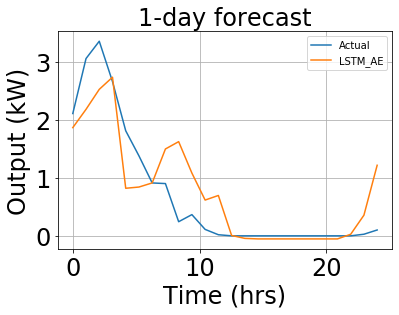

In [60]:
t = np.linspace(0,24,24) 
plt.plot(t,y_check_act_wp/1000, linewidth=1.5)
plt.plot(t,yhat_act_wp /1000, linewidth=1.5)
plt.tick_params(axis='x', labelsize = 24)
plt.tick_params(axis='y', labelsize = 24)
plt.title('1-day forecast', fontsize = 24)
plt.ylabel('Output (kW)', fontsize = 24)
plt.xlabel('Time (hrs)', fontsize = 24)
plt.legend(['Actual','LSTM_AE'], loc='upper right')
plt.savefig(fname = "fig4.png", dpi=400,orientation='portrait')
plt.grid(b = True)
plt.show()

In [20]:
# timetable_Validation_pwr = pd.read_csv("Power_10_06.csv")
# timetable_Validation_irr = pd.read_csv("IRR_Day_2021-06-10.csv")
# val_pwr = pd.DataFrame(timetable_Validation_pwr.iloc[:,1])
# val_irr = pd.DataFrame(timetable_Validation_irr.iloc[:,1])
# val_input = pd.concat([val_irr,val_pwr], axis = 1)
# val_input = val_input.fillna(0)
# # val_input = val_input.dropna(axis=0)
# val_input = val_input.groupby(np.arange(len(val_input))//4).mean()
# val_input.columns = ['irradiation_forecast','power']

In [61]:
#Only for validation


timetable_Validation_pwr = pd.read_csv("Analysis_2021_06_15.csv")
timetable_Validation_irr = pd.read_csv("Analysis_2021_06_15_irr.csv")
power = timetable_Validation_pwr.iloc[:,1]
power = power.values.reshape(-1,1)
power = scaler.fit_transform(power)
val_pwr = pd.DataFrame(power)
irradiation = timetable_Validation_irr.iloc[:,1]
irradiation = irradiation.values.reshape(-1,1)
irradiation = scaler_w.fit_transform(irradiation)
val_irr = pd.DataFrame(irradiation)
val_input = pd.concat([val_irr,val_pwr], axis = 1)
val_input = val_input.fillna(0)
# val_input = val_input.dropna(axis=0)
val_input = val_input.groupby(np.arange(len(val_input))//4).mean()
val_input.columns = ['irradiation_forecast','power']

In [62]:
val_input

,irradiation_forecast,power
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000297,0.000000
4,0.023180,0.021153
5,0.107897,0.087621
6,0.302575,0.313110
7,0.487356,0.567785
8,0.692446,0.774053
9,0.821108,0.877307


In [63]:
days = 1
s_days = 23*days
x_eval = val_input.iloc[:,0:2]
y_eval = pd.DataFrame(val_input.loc[:,'power'])
x_eval_tot  = x_eval[0:s_days+1].values
y_eval_tot  = y_eval[0:s_days+1].values
y_eval_tot = y_eval_tot.reshape(-1,1)
X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
yhat_sp = model_ae.predict(X_check_tot, verbose=0)

In [64]:
yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
yhat_act_wp = scaler.inverse_transform(yhat_sp)
yhat_act_wp = pd.DataFrame(yhat_act_wp)
yhat_act_wp.to_csv('16_06_1AM.csv',index=False)

In [38]:
#Only for validation

timetable_Validation_pwr = pd.read_csv("11_06_1AM.csv")
timetable_Validation_pwr_actual = pd.read_csv("11-6_actual.csv")
timetable_Validation_pwr_actual.fillna(0)
power_actual = timetable_Validation_pwr_actual.iloc[:,1]
power_actual = power_actual.groupby(np.arange(len(power_actual))//4).mean()
power_actual = power_actual.fillna(0)

In [40]:
validation_round_1 = pd.concat([power_actual, timetable_Validation_pwr],axis = 1)
validation_round_1.to_csv('validation_round_1.csv',index=False)

In [32]:
days = 60
s_days = 24*days
x_eval = test_set.iloc[:,2:5]
y_eval = pd.DataFrame(test_set.loc[:,'power'])
x_eval_tot  = x_eval[0:s_days+23].values
y_eval_tot  = y_eval[0:s_days+23].values
y_eval_tot = y_eval_tot.reshape(-1,1)
X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
yhat_sp = model_ae.predict(X_check_tot, verbose=0)
yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
yhat_act_wp = scaler.inverse_transform(yhat_sp)
y_check_act_wp = scaler.inverse_transform(y_check_tot)
error = yhat_act_wp - y_check_act_wp

NameError: name 'test_set' is not defined

In [955]:
rms_ae = np.sqrt(mean_squared_error(yhat_act_wp, y_check_act_wp))
mae_ae = mean_absolute_error(yhat_act_wp, y_check_act_wp)
forecast_errors_ae = [yhat_act_wp[k] - y_check_act_wp[k] for k in range(len(yhat_act_wp))]
mean_forecast_errors_ae[i] = np.mean(forecast_errors_ae)

In [956]:
print(rms_ae,mae_ae,mean_forecast_errors_ae)

659.884782134504 377.2256744427114 [29.88438183]


In [957]:
test_set.head()

,datetime,power,irradiation(t-24),power(t-24)
2368,09-04-17 16,0.212469,0.059971,0.067377
2369,09-04-17 17,0.166059,0.053751,0.061237
2370,09-04-17 18,0.067385,0.031532,0.033976
2371,09-04-17 19,0.006760,0.003441,0.001823
2372,09-04-17 20,0.000000,0.000005,0.000000


In [958]:
month_predicted_data = pd.concat([pd.DataFrame(yhat_act_wp),pd.DataFrame(y_check_act_wp),pd.DataFrame(error)], axis = 1)
month_predicted_data.columns = ['Predicted','Actual','error']

In [959]:
dates = pd.DataFrame(test_set.iloc[1:s_days+1,0])
irr_pred = test_set.iloc[1:s_days+1,2].values
irr_pred = irr_pred.reshape(-1,1)
pwr_pred = test_set.iloc[1:s_days+1,3].values
pwr_pred = pwr_pred.reshape(-1,1)
irr_ppred = scaler_w.inverse_transform(irr_pred)
pwr_ppred = scaler.inverse_transform(pwr_pred)
pwr_ppred = scaler.inverse_transform(pwr_pred)
irr_ppred = pd.DataFrame(irr_ppred)
pwr_ppred = pd.DataFrame(pwr_ppred)
dates = pd.concat([pd.DataFrame(dates.values),irr_ppred,pwr_ppred,month_predicted_data],axis=1)
dates.columns = ['datetime','irradiation(t-24)','Power(t-24)','Predicted','Actual','error']
dates.head(-1)

,datetime,irradiation(t-24),Power(t-24),Predicted,Actual,error
0,09-04-17 17,62.357966,287.090653,1840.144531,2847.131400,-1006.986869
1,09-04-17 18,36.581188,159.288212,932.926270,1853.655096,-920.728826
2,09-04-17 19,3.991498,8.548356,438.901611,754.414701,-315.513089
3,09-04-17 20,0.006109,0.000000,119.782494,183.268341,-63.485847
4,09-04-17 21,0.061647,0.000000,9.480905,3.451388,6.029517
...,...,...,...,...,...,...
1434,08-06-17 11,567.713193,2516.235886,2709.465332,3493.033584,-783.568252
1435,08-06-17 12,872.998519,3752.495130,3121.694092,3933.545213,-811.851121
1436,08-06-17 13,954.399050,4102.945541,3059.163574,4210.258298,-1151.094724
1437,08-06-17 14,835.200859,3684.352541,2917.458740,4243.335784,-1325.877044


In [960]:
dates.to_csv('daily_1_hour.csv',index=False)

In [ ]:
#validation

In [15]:
timetable_Validation_pwr = pd.read_csv("16_06_actual.csv")
timetable_Validation_pwr.fillna(0)
power = timetable_Validation_pwr.iloc[:,1]
power = power.groupby(np.arange(len(power))//4).mean()
power.to_csv('16_06_actual_averaged.csv',index=False)

In [18]:
power_pwr = pd.read_csv("16_06_1AM.csv")

In [19]:
power_pwr

,Time,Power_predicted(W),Power_actual(W)
0,1,0.000000,0.0000
1,2,-47.639626,0.0000
2,3,-47.639626,0.0000
3,4,-46.909782,5.2900
4,5,61.122963,165.4275
5,6,564.861940,711.0250
6,7,1282.779000,1329.5350
7,8,1786.649800,2102.2550
8,9,2197.015600,2828.0250
9,10,2567.897700,3591.8675


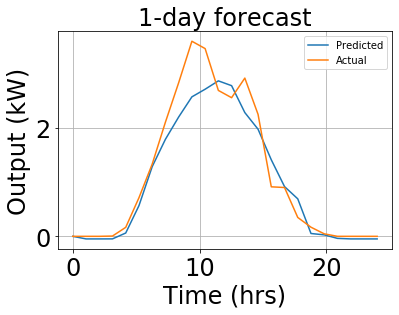

In [20]:
t = np.linspace(0,24,24) 
plt.plot(t,power_pwr.iloc[:,1]/1000, linewidth=1.5)
plt.plot(t,power_pwr.iloc[:,2]/1000, linewidth=1.5)
plt.tick_params(axis='x', labelsize = 24)
plt.tick_params(axis='y', labelsize = 24)
plt.title('1-day forecast', fontsize = 24)
plt.ylabel('Output (kW)', fontsize = 24)
plt.xlabel('Time (hrs)', fontsize = 24)
plt.legend(['Predicted','Actual'], loc='upper right')
plt.savefig(fname = "fig4.png", dpi=400,orientation='portrait')
plt.grid(b = True)
plt.show()